In [1]:
import numpy as np
import seaborn as sns
from scipy.stats import zscore
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 8000)

In [2]:
## IMPORTING DATA

df = pd.read_csv("Life Expectancy Data.csv")
display(df.info())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

None

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [3]:
#Inspecting Data

display(df.head(n=5))
display(df.tail(n=5))

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [4]:
# Summary Statistics
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
# Replacing missing numeric values with the averages of each column
for i in df.select_dtypes(include=[np.number]):
    df[i].fillna(df[i].mean(), inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### HANDLING OUTLIERS

In [7]:
outlier_columns = []
for i in df.select_dtypes(include=[np.number]):
    x = df[i]
    if ((x.mean() + 3*x.std()) < max(x)) or ((x.mean() - 3*x.std()) > min(x)):
        outlier_columns.append(str(i))
        print(f"Column '{i}' may have potential outliers")
    else:
        print(f"Column '{i}' may not have outliers")

Column 'Year' may not have outliers
Column 'Life expectancy ' may have potential outliers
Column 'Adult Mortality' may have potential outliers
Column 'infant deaths' may have potential outliers
Column 'Alcohol' may have potential outliers
Column 'percentage expenditure' may have potential outliers
Column 'Hepatitis B' may have potential outliers
Column 'Measles ' may have potential outliers
Column ' BMI ' may not have outliers
Column 'under-five deaths ' may have potential outliers
Column 'Polio' may have potential outliers
Column 'Total expenditure' may have potential outliers
Column 'Diphtheria ' may have potential outliers
Column ' HIV/AIDS' may have potential outliers
Column 'GDP' may have potential outliers
Column 'Population' may have potential outliers
Column ' thinness  1-19 years' may have potential outliers
Column ' thinness 5-9 years' may have potential outliers
Column 'Income composition of resources' may have potential outliers
Column 'Schooling' may have potential outlier

In [8]:
print(outlier_columns)

['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [9]:
# Using a for loop to handle the outliers by deleting the outliers and their observations
df2 = df.select_dtypes(include=[np.number])

for col in df2:
    z_scores = np.abs((df2 - df2.mean()) / df2.std()) #z score = (element-mean)/standard deviation

    # Set threshold for identifying outliers
    threshold = 3
    
    # Identify outliers
    outliers = (z_scores > threshold)|(threshold < -z_scores)
    outlier_list = list(df2[col][outliers[col]]) #
    #print(outlier_list)
    # Seperate outliers from each column
    #print(df2[col][outliers[col]])
    values_to_exclude = outlier_list
    df2 = df2[~df2[col].isin(values_to_exclude)]

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1997 entries, 14 to 2925
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1997 non-null   int64  
 1   Life expectancy                  1997 non-null   float64
 2   Adult Mortality                  1997 non-null   float64
 3   infant deaths                    1997 non-null   int64  
 4   Alcohol                          1997 non-null   float64
 5   percentage expenditure           1997 non-null   float64
 6   Hepatitis B                      1997 non-null   float64
 7   Measles                          1997 non-null   int64  
 8    BMI                             1997 non-null   float64
 9   under-five deaths                1997 non-null   int64  
 10  Polio                            1997 non-null   float64
 11  Total expenditure                1997 non-null   float64
 12  Diphtheria              

In [10]:
df2 = df.select_dtypes(include=[np.number])
for col in df2.columns:
    z_scores = np.abs((df2 - df2.mean()) / df2.std()) #z score = (element-mean)/standard deviation

    # Set threshold for identifying outliers
    threshold = 3

    # Identify outliers
    outliers = (z_scores > threshold)|(threshold < -z_scores)
    outlier_list = list(df2[col][outliers[col]]) #

    # Printing the outliers in each column
    print(f"\nThere are {len(outlier_list)} outliers in column '{col}': {outlier_list}")
    #print(df2[col][outliers[col]])


There are 0 outliers in column 'Year': []

There are 2 outliers in column 'Life expectancy ': [36.3, 39.0]

There are 40 outliers in column 'Adult Mortality': [566.0, 652.0, 693.0, 699.0, 679.0, 647.0, 593.0, 682.0, 566.0, 592.0, 633.0, 654.0, 675.0, 666.0, 648.0, 622.0, 586.0, 543.0, 559.0, 587.0, 615.0, 613.0, 599.0, 588.0, 564.0, 587.0, 568.0, 539.0, 554.0, 554.0, 578.0, 611.0, 614.0, 587.0, 632.0, 717.0, 723.0, 715.0, 686.0, 665.0]

There are 37 outliers in column 'infant deaths': [391, 422, 457, 490, 910, 957, 1000, 1100, 1100, 1200, 1300, 1300, 1400, 1500, 1500, 1600, 1700, 1700, 1800, 1800, 483, 490, 498, 505, 513, 521, 527, 536, 542, 549, 556, 563, 567, 571, 574, 576, 385]

There are 4 outliers in column 'Alcohol': [17.31, 16.99, 17.87, 16.58]

There are 84 outliers in column 'percentage expenditure': [10769.36305, 11734.85381, 11714.99858, 10986.26527, 8875.786493, 7172.275229, 8547.292357, 8350.193523, 7878.372355, 8272.306757, 7423.228774, 8053.557638, 8329.731655, 7453.864

In [11]:
for i in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    l_bound = Q1 - 1.5*IQR
    u_bound = Q3 + 1.5*IQR
    df[i] = np.where(df[i] > u_bound, u_bound, df[i])
    df[i] = np.where(df[i] < l_bound, l_bound, df[i])

In [12]:
# df2 = df.select_dtypes(include=[np.number])
# for col in df2.columns:
#     z_scores = np.abs((df2 - df2.mean()) / df2.std()) #z score = (element-mean)/standard deviation

#     # Set threshold for identifying outliers
#     threshold = 3

#     # Identify outliers
#     outliers = (z_scores > threshold)|(threshold < -z_scores)
#     outlier_list = list(df2[col][outliers[col]]) #

#     # Printing the outliers in each column
#     print(f"\nThere are {len(outlier_list)} outliers in column '{col}': {outlier_list}")
#     #print(df2[col][outliers[col]])

In [13]:
from scipy.stats import mstats, stats

# Winsorize outliers using the 97th and 3rd percentiles (because threshold = 3)
for i in df.select_dtypes(include=[np.number]):
    if i == 'Alcohol':
        z_scores = stats.zscore(df[i])
        df[i] = mstats.winsorize(df[i], limits=[0, 0.01])

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_16468\2974967562.py:6: DeprecationWarning: Please use `zscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  z_scores = stats.zscore(df[i])


In [14]:
df2 = df.select_dtypes(include=[np.number])
for col in df2.columns:
    z_scores = np.abs((df2 - df2.mean()) / df2.std()) #z score = (element-mean)/standard deviation

    # Set threshold for identifying outliers
    threshold = 3

    # Identify outliers
    outliers = (z_scores > threshold)|(threshold < -z_scores)
    outlier_list = list(df2[col][outliers[col]]) #

    # Printing the outliers in each column
    print(f"\nThere are {len(outlier_list)} outliers in column '{col}': {outlier_list}")
    #print(df2[col][outliers[col]])


There are 0 outliers in column 'Year': []

There are 0 outliers in column 'Life expectancy ': []

There are 0 outliers in column 'Adult Mortality': []

There are 0 outliers in column 'infant deaths': []

There are 0 outliers in column 'Alcohol': []

There are 0 outliers in column 'percentage expenditure': []

There are 0 outliers in column 'Hepatitis B': []

There are 0 outliers in column 'Measles ': []

There are 0 outliers in column ' BMI ': []

There are 0 outliers in column 'under-five deaths ': []

There are 0 outliers in column 'Polio': []

There are 0 outliers in column 'Total expenditure': []

There are 0 outliers in column 'Diphtheria ': []

There are 0 outliers in column ' HIV/AIDS': []

There are 0 outliers in column 'GDP': []

There are 0 outliers in column 'Population': []

There are 0 outliers in column ' thinness  1-19 years': []

There are 0 outliers in column ' thinness 5-9 years': []

There are 0 outliers in column 'Income composition of resources': []

There are 0 o

In [15]:
len(df['Country'].unique().tolist())

193

<Axes: xlabel='count', ylabel='Country'>

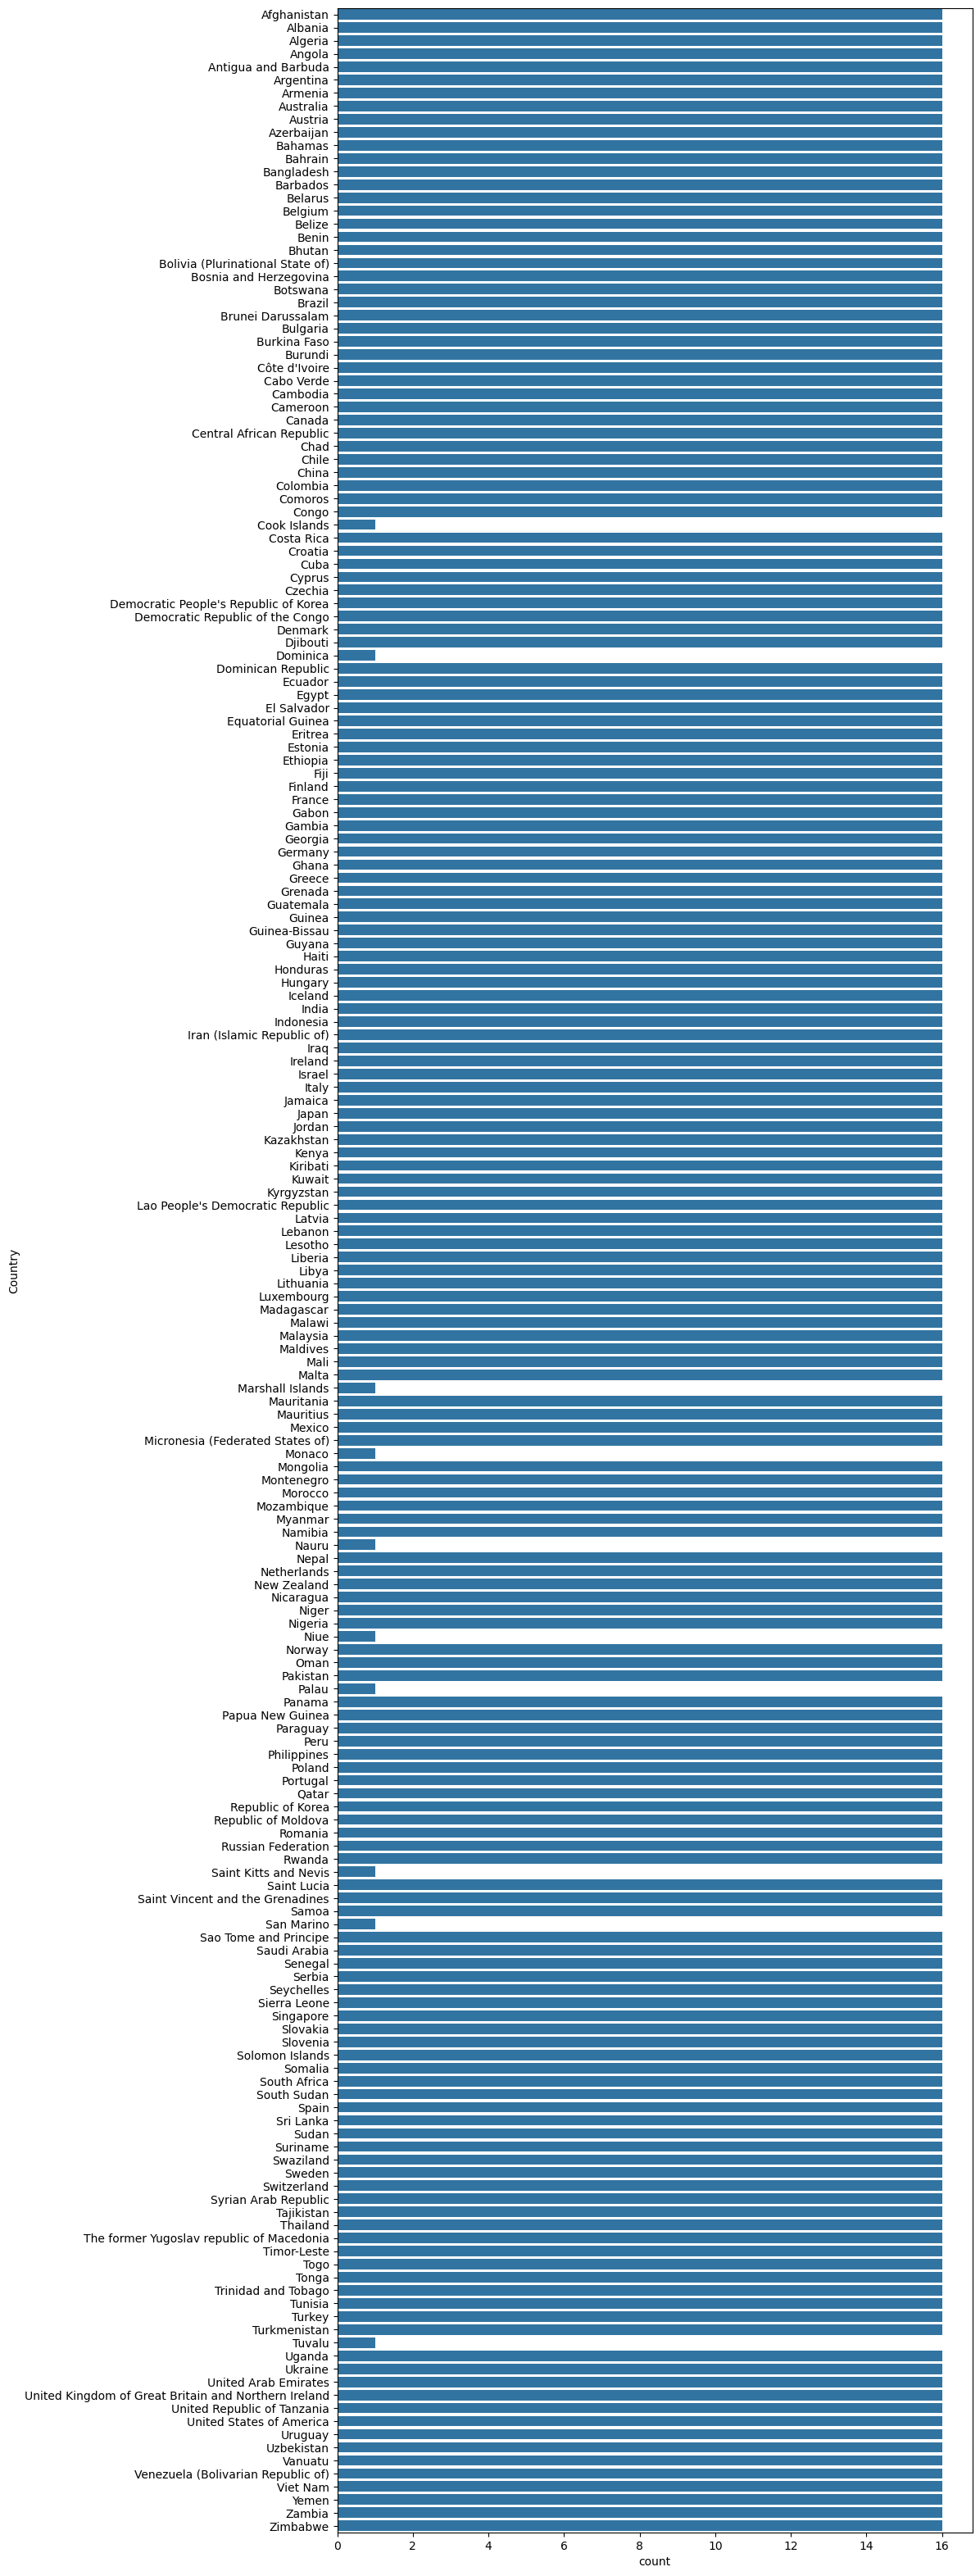

In [16]:
## COUNTPLOT FOR COUNTRIES

plt.figure(figsize = (10,40))
sns.countplot(data=df, y = 'Country')

#### There are 193 countries in the data

In [17]:
# Grouping data by a column and calculating the sum
for i in df2:
    if i != 'Year':
        print(f"\n\nThis shows the summary of {i} for each country")
        display(df.groupby(['Country'])[i].sum())



This shows the summary of Life expectancy  for each country


Country
Afghanistan                                              931.100000
Albania                                                 1202.500000
Algeria                                                 1177.900000
Angola                                                   784.300000
Antigua and Barbuda                                     1200.900000
Argentina                                               1202.500000
Armenia                                                 1174.400000
Australia                                               1309.000000
Austria                                                 1303.700000
Azerbaijan                                              1131.700000
Bahamas                                                 1188.600000
Bahrain                                                 1211.600000
Bangladesh                                              1108.800000
Barbados                                                1189.700000
Belarus                                 



This shows the summary of Adult Mortality for each country


Country
Afghanistan                                             4305.000000
Albania                                                  721.000000
Algeria                                                 1731.000000
Angola                                                  5257.000000
Antigua and Barbuda                                     2040.000000
Argentina                                               1696.000000
Armenia                                                 1878.000000
Australia                                               1011.000000
Austria                                                 1052.000000
Azerbaijan                                              1843.000000
Bahamas                                                 2433.000000
Bahrain                                                 1046.000000
Bangladesh                                              2262.000000
Barbados                                                1242.000000
Belarus                                 



This shows the summary of infant deaths for each country


Country
Afghanistan                                             880.0
Albania                                                  11.0
Algeria                                                 325.0
Angola                                                  880.0
Antigua and Barbuda                                       0.0
Argentina                                               162.0
Armenia                                                  16.0
Australia                                                16.0
Austria                                                   0.0
Azerbaijan                                               97.0
Bahamas                                                   0.0
Bahrain                                                   0.0
Bangladesh                                              880.0
Barbados                                                  0.0
Belarus                                                   9.0
Belgium                                                   4.0




This shows the summary of Alcohol for each country


Country
Afghanistan                                               0.230000
Albania                                                  77.580000
Algeria                                                  10.702861
Angola                                                   90.712861
Antigua and Barbuda                                     123.842861
Argentina                                               124.102861
Armenia                                                  60.142861
Australia                                               156.932861
Austria                                                 188.142861
Azerbaijan                                               19.482861
Bahamas                                                 158.672861
Bahrain                                                  33.622861
Bangladesh                                                4.752861
Barbados                                                127.702861
Belarus                                               



This shows the summary of percentage expenditure for each country


Country
Afghanistan                                               559.361761
Albania                                                  3092.145451
Algeria                                                  3778.963851
Angola                                                   1633.604294
Antigua and Barbuda                                     10692.913241
Argentina                                               11045.117952
Armenia                                                  2096.118700
Australia                                               13401.948156
Austria                                                 13826.633043
Azerbaijan                                               2098.379951
Bahamas                                                     0.000000
Bahrain                                                  7607.541922
Bangladesh                                                517.135544
Barbados                                                 5422.287977
Belarus                   



This shows the summary of Hepatitis B for each country


Country
Afghanistan                                             1033.000000
Albania                                                 1568.000000
Algeria                                                 1359.464151
Angola                                                  1198.583229
Antigua and Barbuda                                     1554.940461
Argentina                                               1349.232075
Armenia                                                 1404.351153
Australia                                               1481.940461
Austria                                                 1336.702306
Azerbaijan                                              1170.987841
Bahamas                                                 1421.642767
Bahrain                                                 1570.000000
Bangladesh                                              1365.874843
Barbados                                                1382.291614
Belarus                                 



This shows the summary of Measles  for each country


Country
Afghanistan                                             12993.500
Albania                                                   854.000
Algeria                                                  6048.750
Angola                                                  11341.875
Antigua and Barbuda                                         0.000
Argentina                                                  32.000
Armenia                                                  2125.250
Australia                                                1663.000
Austria                                                  1236.000
Azerbaijan                                               4703.875
Bahamas                                                     0.000
Bahrain                                                   107.000
Bangladesh                                              12178.875
Barbados                                                    0.000
Belarus                                                   397.000
Be



This shows the summary of  BMI  for each country


Country
Afghanistan                                              248.300000
Albania                                                  785.100000
Algeria                                                  779.900000
Angola                                                   288.300000
Antigua and Barbuda                                      614.800000
Argentina                                                879.700000
Armenia                                                  715.300000
Australia                                                893.800000
Austria                                                  772.600000
Azerbaijan                                               701.500000
Bahamas                                                  846.100000
Bahrain                                                  826.500000
Bangladesh                                               206.000000
Barbados                                                 735.600000
Belarus                                 



This shows the summary of under-five deaths  for each country


Country
Afghanistan                                             1120.0
Albania                                                   15.0
Algeria                                                  376.0
Angola                                                  1120.0
Antigua and Barbuda                                        0.0
Argentina                                                182.0
Armenia                                                   16.0
Australia                                                 22.0
Austria                                                    0.0
Azerbaijan                                               115.0
Bahamas                                                    0.0
Bahrain                                                    0.0
Bangladesh                                              1120.0
Barbados                                                   0.0
Belarus                                                   14.0
Belgium                                        



This shows the summary of Polio for each country


Country
Afghanistan                                              924.000000
Albania                                                 1570.000000
Algeria                                                 1468.000000
Angola                                                   963.000000
Antigua and Barbuda                                     1551.000000
Argentina                                               1494.000000
Armenia                                                 1466.500000
Australia                                               1428.500000
Austria                                                 1376.000000
Azerbaijan                                              1296.000000
Bahamas                                                 1520.000000
Bahrain                                                 1568.000000
Bangladesh                                              1440.500000
Barbados                                                1366.000000
Belarus                                 



This shows the summary of Total expenditure for each country


Country
Afghanistan                                             132.040000
Albania                                                  95.130000
Algeria                                                  74.998190
Angola                                                   64.728190
Antigua and Barbuda                                      77.808190
Argentina                                               109.628190
Armenia                                                  78.858190
Australia                                               138.488190
Austria                                                  76.668190
Azerbaijan                                               91.128190
Bahamas                                                 106.528190
Bahrain                                                  63.048190
Bangladesh                                               48.758190
Barbados                                                 97.768190
Belarus                                               



This shows the summary of Diphtheria  for each country


Country
Afghanistan                                              945.500000
Albania                                                 1569.000000
Algeria                                                 1470.000000
Angola                                                   966.000000
Antigua and Barbuda                                     1573.000000
Argentina                                               1478.000000
Armenia                                                 1438.500000
Australia                                               1430.500000
Austria                                                 1388.000000
Azerbaijan                                              1317.000000
Bahamas                                                 1532.000000
Bahrain                                                 1569.000000
Bangladesh                                              1484.000000
Barbados                                                1439.000000
Belarus                                 



This shows the summary of  HIV/AIDS for each country


Country
Afghanistan                                              1.60
Albania                                                  1.60
Algeria                                                  1.60
Angola                                                  29.60
Antigua and Barbuda                                      2.00
Argentina                                                1.60
Armenia                                                  1.60
Australia                                                1.60
Austria                                                  1.60
Azerbaijan                                               1.60
Bahamas                                                  1.90
Bahrain                                                  1.60
Bangladesh                                               1.60
Barbados                                                 4.10
Belarus                                                  1.60
Belgium                                                  1.60




This shows the summary of GDP for each country


Country
Afghanistan                                               5440.246807
Albania                                                  33915.626862
Algeria                                                  45565.654277
Angola                                                   31602.288722
Antigua and Barbuda                                     156148.891650
Argentina                                               111977.201650
Armenia                                                  31999.781082
Australia                                               210541.638596
Austria                                                 236094.798265
Azerbaijan                                               52847.164912
Bahamas                                                 119730.535506
Bahrain                                                 159608.312178
Bangladesh                                                7096.983696
Barbados                                                192273.576470
Belarus     



This shows the summary of Population for each country


Country
Afghanistan                                             1.565981e+08
Albania                                                 1.115059e+07
Algeria                                                 3.012078e+08
Angola                                                  1.623536e+08
Antigua and Barbuda                                     2.040540e+08
Argentina                                               2.510305e+08
Armenia                                                 1.624263e+07
Australia                                               7.339216e+07
Austria                                                 1.035981e+08
Azerbaijan                                              3.451793e+07
Bahamas                                                 2.040540e+08
Bahrain                                                 2.040540e+08
Bangladesh                                              2.225792e+08
Barbados                                                2.040540e+08
Belarus                   



This shows the summary of  thinness  1-19 years for each country


Country
Afghanistan                                             219.300000
Albania                                                  25.900000
Algeria                                                  97.500000
Angola                                                   99.100000
Antigua and Barbuda                                      54.800000
Argentina                                                17.200000
Armenia                                                  32.600000
Australia                                                10.700000
Austria                                                  27.700000
Azerbaijan                                               46.400000
Bahamas                                                  40.800000
Bahrain                                                  97.700000
Bangladesh                                              181.350000
Barbados                                                 63.300000
Belarus                                               



This shows the summary of  thinness 5-9 years for each country


Country
Afghanistan                                             209.900000
Albania                                                  27.200000
Algeria                                                  95.600000
Angola                                                  106.700000
Antigua and Barbuda                                      54.000000
Argentina                                                15.200000
Armenia                                                  33.800000
Australia                                                10.000000
Austria                                                  31.000000
Azerbaijan                                               47.100000
Bahamas                                                  40.300000
Bahrain                                                  95.200000
Bangladesh                                              184.100000
Barbados                                                 62.700000
Belarus                                               



This shows the summary of Income composition of resources for each country


Country
Afghanistan                                              6.646000
Albania                                                 11.358000
Algeria                                                 11.118000
Angola                                                   7.334000
Antigua and Barbuda                                      8.433750
Argentina                                               12.706000
Armenia                                                 11.174000
Australia                                               14.690000
Austria                                                 13.798000
Azerbaijan                                              11.243000
Bahamas                                                 11.909625
Bahrain                                                 12.927000
Bangladesh                                               8.286000
Barbados                                                12.327000
Belarus                                                 11.892000
Be



This shows the summary of Schooling for each country


Country
Afghanistan                                             131.400000
Albania                                                 194.200000
Algeria                                                 203.400000
Angola                                                  128.700000
Antigua and Barbuda                                     169.100000
Argentina                                               264.100000
Armenia                                                 188.600000
Australia                                               314.300000
Austria                                                 246.200000
Azerbaijan                                              181.600000
Bahamas                                                 198.800000
Bahrain                                                 225.800000
Bangladesh                                              139.100000
Barbados                                                238.300000
Belarus                                               

<Axes: >

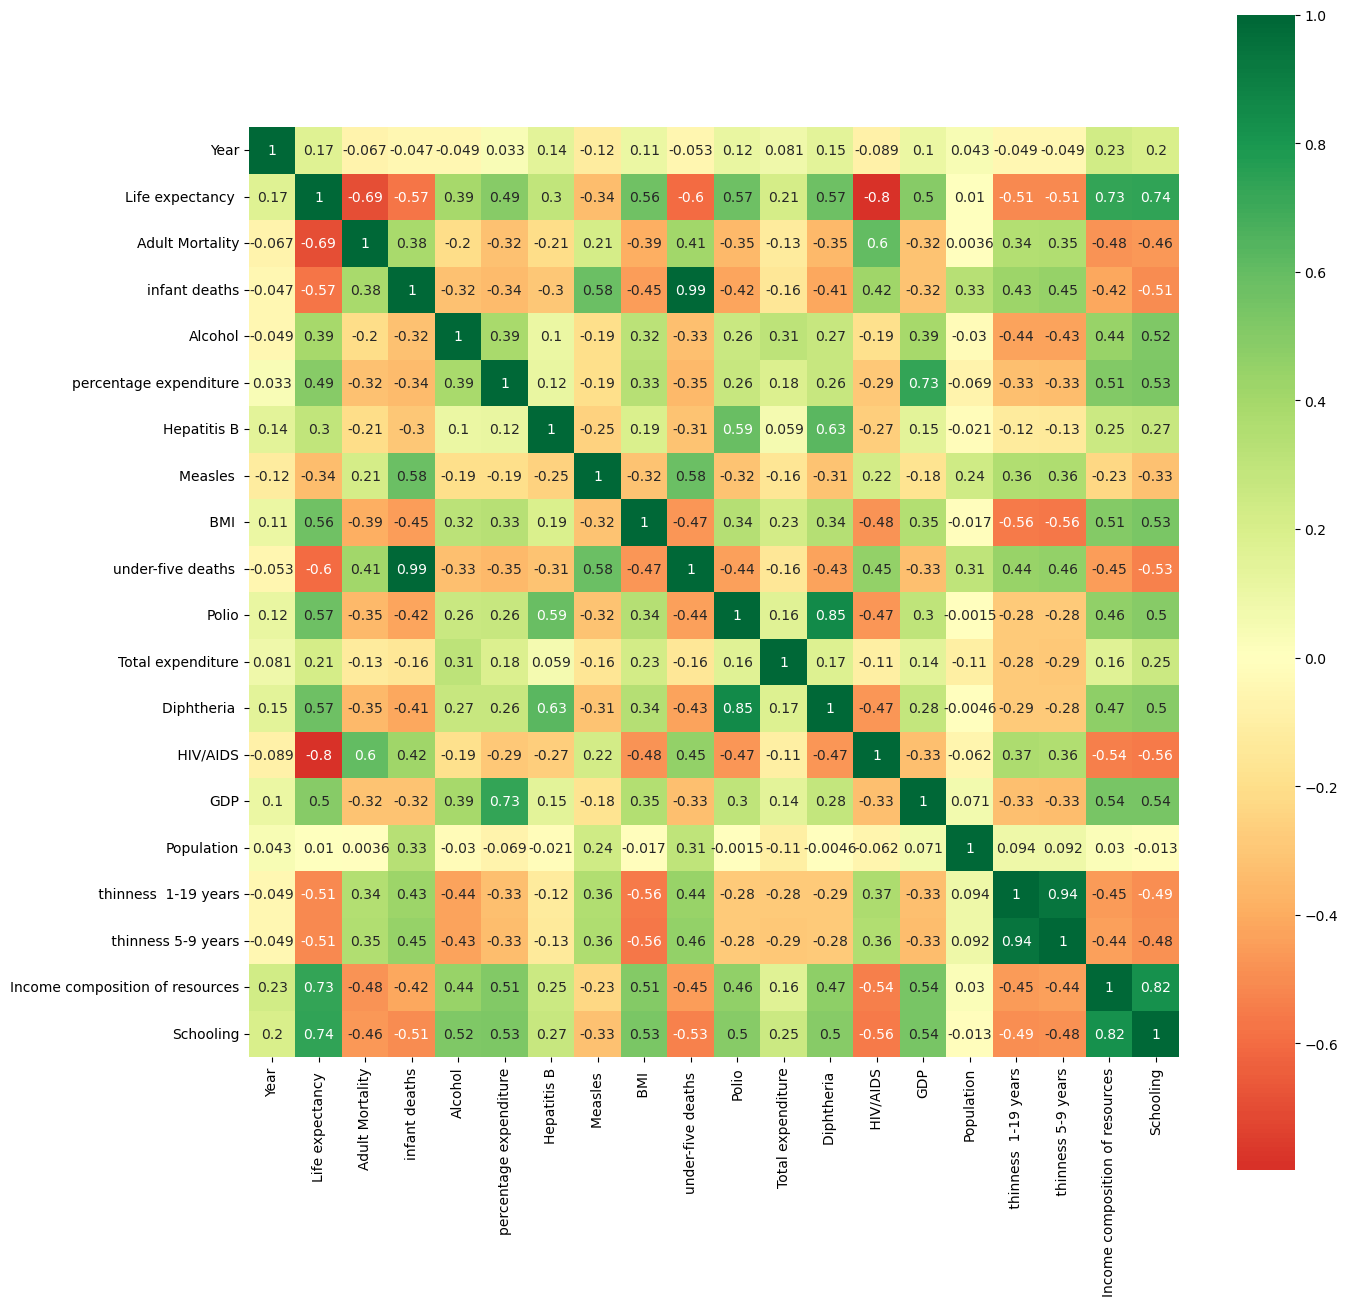

In [18]:
## Plot a heatmap
plt.figure(figsize = (15,15))
sns.heatmap(df2.corr(), annot=True, cmap='RdYlGn', center=0, square=True)

### From the Heatmap, it is seen that:
- The higher the level of education and Income composition of resources, The better the life expectancy of the country
- The higher the level of HIV/AIDS, the lower the Life Expectancy
- The higher the adult mortality, the lower the Life Expectancy
- The higher the level of education, the higher the Income composition of resources

In [19]:
#Grouping the data by each country and showing the country's Status and mean life expectancy

grouped_data = df.groupby(['Country', 'Status'], as_index=True).agg({"Life expectancy ": pd.Series.mean})
grouped_data.sort_values('Life expectancy ', ascending=False, inplace=True)
grouped_data

,,Life expectancy
Country,Status,
Japan,Developed,82.537500
Sweden,Developed,82.518750
Iceland,Developed,82.443750
Switzerland,Developed,82.331250
France,Developing,82.218750
Italy,Developed,82.187500
Spain,Developed,82.068750
Australia,Developed,81.812500
Norway,Developed,81.793750


#### Japan has the highest average life expectancy of 82
#### Sierra Leone has the lowest average life expectancy of 47

In [20]:
# Splitting developed countries' records from developing countries' records
 
condition = df['Status'] == 'Developed'
df_ed = df[condition]
df_ing = df[~condition]

# Viewing Summary Statistics
display("Developed Countries", df_ed.describe(),'Developing Countries', df_ing.describe())

'Developed Countries'

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,5.120000e+02,512.000000,5.120000e+02,512.000000,512.000000,512.000000,512.000000
mean,2007.500000,79.197852,79.685547,1.494141,9.524590,641.718089,87.488530,132.187012,51.803906,1.810547,94.290039,7.332309,94.267578,1.000000e-01,10538.810635,6.553609e+06,1.320703,1.296680,0.831401,15.471004
std,4.614281,3.930942,47.877583,4.585774,2.914469,473.343208,9.789384,257.807430,17.196829,5.384006,6.665429,2.627856,7.388816,8.890471e-16,6607.611739,8.163860e+06,0.756577,0.829099,0.082688,1.992149
min,2000.000000,69.900000,1.000000,0.000000,0.010000,0.000000,58.351153,0.000000,3.200000,0.000000,49.500000,1.100000,49.500000,1.000000e-01,12.277330,1.230000e+02,0.300000,0.200000,0.627551,11.500000
25%,2003.750000,76.800000,58.000000,0.000000,7.967500,92.904052,80.940461,0.000000,53.775000,0.000000,93.000000,6.075000,93.750000,1.000000e-01,4461.113482,3.080632e+05,0.700000,0.600000,0.797750,14.200000
50%,2007.500000,79.250000,73.000000,0.000000,10.205000,846.615644,89.000000,12.000000,57.450000,0.000000,96.000000,7.755000,96.000000,1.000000e-01,8477.325445,3.180574e+06,1.100000,1.000000,0.852000,15.500000
75%,2011.250000,81.700000,96.000000,1.000000,11.582500,1096.807347,96.000000,96.500000,61.300000,2.000000,98.000000,9.140000,98.000000,1.000000e-01,17837.165680,1.275338e+07,1.900000,1.900000,0.891250,16.600000
max,2015.000000,89.000000,229.000000,28.000000,13.450000,1096.807347,99.000000,900.625000,69.600000,33.000000,99.000000,11.770000,99.000000,1.000000e-01,17837.165680,3.125506e+07,4.000000,4.300000,0.948000,19.800000


'Developing Countries'

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2.426000e+03,2426.000000,2426.000000,2426.000000,2426.000000
mean,2007.522671,67.132131,179.401469,16.197444,3.547908,208.560136,84.036650,255.179308,35.475772,21.375515,83.389305,5.603223,83.326116,0.628277,4005.229418,7.919700e+06,5.419600,5.447482,0.590028,11.320475
std,4.614690,8.955409,118.049860,20.003138,3.198758,322.142580,13.276767,367.150624,19.291419,26.380678,16.499612,2.090881,16.407827,0.730515,4614.854453,9.027708e+06,3.957054,3.996545,0.181232,2.793740
min,2000.000000,44.600000,1.000000,0.000000,0.010000,0.000000,58.351153,0.000000,1.000000,0.000000,49.500000,0.370000,49.500000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.102625,4.600000
25%,2004.000000,61.100000,92.250000,1.000000,0.580000,3.616102,78.000000,0.000000,18.400000,1.000000,74.000000,4.252500,75.000000,0.100000,464.452290,4.634202e+05,2.100000,2.100000,0.475000,9.700000
50%,2008.000000,69.050000,164.000000,6.000000,2.950000,48.431829,86.500000,18.000000,36.200000,7.000000,91.000000,5.630000,89.000000,0.100000,1877.508125,3.742413e+06,4.800000,4.700000,0.627551,11.900000
75%,2012.000000,74.000000,252.750000,28.000000,5.390000,257.702204,96.000000,514.500000,53.075000,39.000000,97.000000,6.700000,96.000000,1.400000,7483.158469,1.275338e+07,7.700000,7.700000,0.722000,13.100000
max,2015.000000,89.000000,456.500000,55.000000,13.450000,1096.807347,99.000000,900.625000,87.300000,70.000000,99.000000,11.770000,99.000000,1.850000,17837.165680,3.125506e+07,15.350000,15.600000,0.919000,18.300000


#### FROM THE ABOVE CELL:
- We can see that developed countries have a higher average life expectancy value than developing countries